<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data.xlsx'

In [5]:
data = pd.read_excel(path)

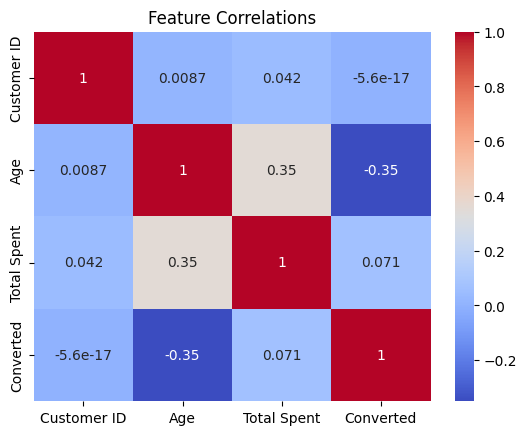

In [8]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

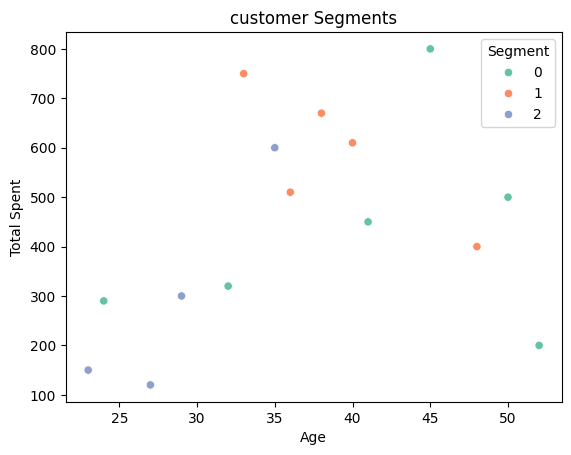

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=3)
data['Segment'] = kmeans.fit_predict(scaled_data)

sns.scatterplot(x='Age', y='Total Spent', hue='Segment', data=data, palette='Set2')
plt.title('customer Segments')
plt.show()

In [12]:
import numpy as np
from scipy import stats

In [14]:
group_a = np.array([0.13, 0.12, 0.11, 0.15, 0.14])
group_b = np.array([0.18, 0.19, 0.17, 0.21, 0.20])

t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between group A and group B.")


else:
    print("No significant difference found between group A and group B.")


T-Statistic: -6.0, P-Value: 0.0003233932218851488
There is a statistically significant difference between group A and group B.


In [18]:
clv_data = data.groupby('Customer ID').agg({
    'Total Spent': ['mean', 'count', 'sum'],
    'Age': lambda x: (x.max() -x.min())
}).rename(columns={'mean': 'AveragePurchase', 'count': 'Frequency', 'sum': 'TotalRevenue'})

clv_data['CLV'] = clv_data[('Total Spent', 'AveragePurchase')] * clv_data[('Total Spent', 'Frequency')] * clv_data[('Total Spent', 'TotalRevenue')]
print(clv_data.head())

                Total Spent                             Age       CLV
            AveragePurchase Frequency TotalRevenue <lambda>          
Customer ID                                                          
1                     150.0         1          150        0   22500.0
2                     600.0         1          600        0  360000.0
3                     800.0         1          800        0  640000.0
4                     200.0         1          200        0   40000.0
5                     300.0         1          300        0   90000.0


In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Customer ID'], order= (1, 1, 1,))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


15    15.999864
16    16.999475
17    17.998832
18    18.997936
19    19.996787
20    20.995384
21    21.993728
22    22.991819
23    23.989657
24    24.987242
25    25.984574
26    26.981654
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
